In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import FormatStrFormatter
from matplotlib.legend_handler import HandlerLineCollection, HandlerTuple

In [12]:
def make_df(file):
    data = pd.read_csv(file)
    return pd.DataFrame(data)

sentiment_df = make_df('https://raw.githubusercontent.com/jkrovitz/Collective_Intelligence_Final_Project/master/PLOTS_AND_ASSOCIATED_ITEMS/DATA_FOR_PLOTS/sentiment.csv')
reviews_df = make_df('https://raw.githubusercontent.com/jkrovitz/Collective_Intelligence_Final_Project/master/PLOTS_AND_ASSOCIATED_ITEMS/DATA_FOR_PLOTS/reviews.csv')
literacy_df = make_df('https://raw.githubusercontent.com/jkrovitz/Collective_Intelligence_Final_Project/master/PLOTS_AND_ASSOCIATED_ITEMS/DATA_FOR_PLOTS/literacy.csv')
genre_df = make_df('https://raw.githubusercontent.com/jkrovitz/Collective_Intelligence_Final_Project/master/PLOTS_AND_ASSOCIATED_ITEMS/DATA_FOR_PLOTS/genre.csv')
box_office_df = make_df('https://raw.githubusercontent.com/jkrovitz/Collective_Intelligence_Final_Project/master/PLOTS_AND_ASSOCIATED_ITEMS/DATA_FOR_PLOTS/box_office.csv')

In [13]:
sentiment_df.head()

,Movie_Id,Movies,Positive,CS,Negative,CS.1,Neutral,CS.2,Mixed,CS.3,num tweets
0,A,Dumbo,26.95%,0.275791,21.23%,0.216791,49.00%,0.451525,2.82%,0.055893,2200
1,B,Shazam,43.37%,0.419578,9.91%,0.114353,43.54%,0.408848,3.19%,0.057221,20702
2,C,Pet Semetary,26.63%,0.272510,19.56%,0.204773,48.94%,0.448809,4.88%,0.073908,3523
3,D,The Haunting of Sharon Tate,21.48%,0.239147,17.04%,0.159054,57.78%,0.549014,3.70%,0.052784,135
4,E,The Best of Enemies,32.41%,0.333554,7.12%,0.084198,59.26%,0.549265,1.20%,0.032983,3903


In [14]:
reviews_df.head()

,Movies,DATE,TOMATO METER,AUDIENCE SCORE,METACRITIC,AUDIENCE SCORE.1,IMDB,Budget (Box Office Mojo),Gross (1st Week),Gross / Budget
0,Little Woods,4/19/19,98%,82%,74%,NaN,5.8,NaN,"$82,166",NaN
1,Shazam,4/8/19,91%,90%,71%,8.0,7.7,"$100,000,000","$69,773,013",0.697730
2,Missing Link,4/12/19,89%,74%,68%,NaN,7.1,NaN,"$8,607,241",NaN
3,Breakthrough,4/19/19,65%,76%,47%,7.3,5.5,NaN,"$3,506,925",NaN
4,Pet Semetary,4/8/19,59%,44%,57%,5.8,6.2,"$21,000,000","$31,121,660",1.481984


In [15]:
genre_df.head()

,Movies,Movie Genre
0,Dumbo,"Animation, Kids & Family, Science Fiction & Fa..."
1,Pet Semetary,Horror
2,Shazam,"Action & Adventure, Science Fiction & Fantasy"
3,The Best of Enemies,Drama
4,The Haunting of Sharon Tate,"Drama, Horror, Mystery & Suspense"


In [16]:
literacy_df.head()

,Movies,Lexicon,Sentence,Flesch,Flesch-Kincaid,Approx Grade Level
0,Dumbo,21.871364,1.501818,70.400764,7.398000,NaN
1,Shazam,23.685586,1.725389,69.160471,7.450048,NaN
2,Pet Semetary,21.148453,1.612262,70.511956,7.006273,NaN
3,The Haunting of Sharon Tate,22.274074,1.607407,59.312815,8.871111,NaN
4,The Best of Enemies,24.634640,1.695875,50.609969,10.225135,NaN


In [17]:
tomato_pos_combo_df = pd.merge(sentiment_df, reviews_df)

In [18]:
tomato_pos_combo_df

,Movie_Id,Movies,Positive,CS,Negative,CS.1,Neutral,CS.2,Mixed,CS.3,num tweets,DATE,TOMATO METER,AUDIENCE SCORE,METACRITIC,AUDIENCE SCORE.1,IMDB,Budget (Box Office Mojo),Gross (1st Week),Gross / Budget
0,A,Dumbo,26.95%,0.275791,21.23%,0.216791,49.00%,0.451525,2.82%,0.055893,2200,4/1/19,49%,60%,52%,5.4,6.8,"$170,000,000","$58,047,489",0.341456
1,B,Shazam,43.37%,0.419578,9.91%,0.114353,43.54%,0.408848,3.19%,0.057221,20702,4/8/19,91%,90%,71%,8.0,7.7,"$100,000,000","$69,773,013",0.697730
2,C,Pet Semetary,26.63%,0.272510,19.56%,0.204773,48.94%,0.448809,4.88%,0.073908,3523,4/8/19,59%,44%,57%,5.8,6.2,"$21,000,000","$31,121,660",1.481984
3,D,The Haunting of Sharon Tate,21.48%,0.239147,17.04%,0.159054,57.78%,0.549014,3.70%,0.052784,135,4/8/19,14%,75%,8%,6.2,3.2,NaN,NaN,NaN
4,E,The Best of Enemies,32.41%,0.333554,7.12%,0.084198,59.26%,0.549265,1.20%,0.032983,3903,4/8/19,54%,77%,49%,5.2,7.1,"$10,000,000","$6,101,570",0.610157
5,F,Hellboy,27.84%,0.286287,19.77%,0.197765,46.36%,0.431565,6.03%,0.084384,5306,4/12/19,15%,65%,31%,5.0,6.9,"$50,000,000","$15,796,271",0.315925
6,G,Missing Link,25.77%,0.246444,35.05%,0.322283,30.58%,0.309564,8.59%,0.121708,582,4/12/19,89%,74%,68%,NaN,7.1,NaN,"$8,607,241",NaN
7,H,The Curse of La Llorona,18.52%,0.202692,25.03%,0.263103,53.39%,0.468228,3.07%,0.065977,1890,4/19/19,33%,56%,41%,6.1,5.9,"$9,000,000","$33,784,301",3.753811
8,I,Breakthrough,41.69%,0.408676,6.61%,0.082675,51.06%,0.480072,0.64%,0.028577,1559,4/19/19,65%,76%,47%,7.3,5.5,NaN,"$3,506,925",NaN
9,J,Little Woods,29.78%,0.298520,18.67%,0.202875,49.33%,0.449835,2.22%,0.048769,225,4/19/19,98%,82%,74%,NaN,5.8,NaN,"$82,166",NaN


In [19]:
tomato_percent_list = tomato_pos_combo_df['TOMATO METER'].tolist()

In [20]:
positive_sentiment_percent_list = tomato_pos_combo_df['Positive '].tolist()

In [21]:
audience_score_percent_list = tomato_pos_combo_df['AUDIENCE SCORE'].tolist()

In [22]:
movie_list = tomato_pos_combo_df['Movies'].tolist()

In [23]:
movie_id_list = tomato_pos_combo_df['Movie_Id'].tolist()

In [42]:
#Convert percents to floats. 

def convert_to_float(percent_list):
    float_list = []
    for i in percent_list:
        a_float = float(i.strip('%')) / 100
        rounded_float = round(a_float, 2) 
        float_list.append(rounded_float)
    return float_list 


tomato_float_list = convert_to_float(tomato_percent_list)
print(tomato_float_list)

positive_sentiment_float_list = convert_to_float(positive_sentiment_percent_list)
print(positive_sentiment_float_list)

audience_score_float_list = convert_to_float(audience_score_percent_list)
print(audience_score_float_list)

[0.49, 0.91, 0.59, 0.14, 0.54, 0.15, 0.89, 0.33, 0.65, 0.98]
[0.27, 0.43, 0.27, 0.21, 0.32, 0.28, 0.26, 0.19, 0.42, 0.3]
[0.6, 0.9, 0.44, 0.75, 0.77, 0.65, 0.74, 0.56, 0.76, 0.82]


Correlation coefficient for Tomato Meter Scores and Positive Sentiment:
[[1.        0.5422188]
 [0.5422188 1.       ]]


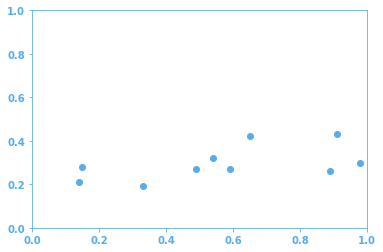

In [116]:
from numpy import *
from matplotlib.pyplot import *

def make_scatter_plot_and_calculate_correlation_coefficient(x, y, plt_title, x_label, y_label, img_file_path):
    fig, ax = plt.subplots(edgecolor='#55acee', facecolor='white')
    
    ax.tick_params(axis='x', color='#55acee')
    ax.tick_params(axis='y', color='#55acee')
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])

    ax.set_yticklabels(np.arange(0,1,.1),color='#55acee',  fontweight='bold')
    ax.set_xticklabels(np.arange(0,1,.1),color='#55acee',  fontweight='bold')

    ax.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%0.1f'))

    ax.spines['bottom'].set_color('#55acee')
    ax.spines['top'].set_color('#55acee') 
    ax.spines['right'].set_color('#55acee')
    ax.spines['left'].set_color('#55acee')
    ax.scatter(x, y, color='#55acee')

    print('Correlation coefficient for ' + x_label + ' and ' + y_label + ':')
    print(np.corrcoef(x, y))

    plt.savefig(img_file_path)
   
    
    

    


    
    
    
    
    
    

make_scatter_plot_and_calculate_correlation_coefficient(tomato_float_list, positive_sentiment_float_list, 'Tomato Meter vs. Positive Sentiment Scores', 'Tomato Meter Scores', 'Positive Sentiment', 'PLOTS_AND_ASSOCIATED_ITEMS/PLOT_PICS/tomato_pos_scatter_plt.png')




Correlation coefficient for Tomato Meter Scores and Audience Score:
[[1.         0.45622692]
 [0.45622692 1.        ]]


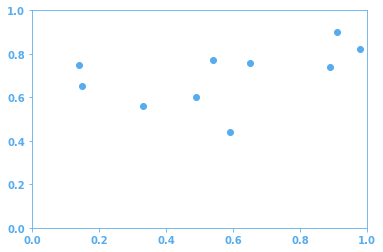

In [117]:
make_scatter_plot_and_calculate_correlation_coefficient(tomato_float_list, audience_score_float_list, 'Tomato Meter vs. Audience Scores', 'Tomato Meter Scores', 'Audience Score', 'PLOTS_AND_ASSOCIATED_ITEMS/PLOT_PICS/tomato_audience_scatter_plt.png')


In [119]:
genre_and_literacy_combo_df = pd.merge(genre_df, literacy_df)

genre_and_literacy_combo_df

,Movies,Movie Genre,Lexicon,Sentence,Flesch,Flesch-Kincaid,Approx Grade Level
0,Dumbo,"Animation, Kids & Family, Science Fiction & Fa...",21.871364,1.501818,70.400764,7.398000,NaN
1,Pet Semetary,Horror,21.148453,1.612262,70.511956,7.006273,NaN
2,Shazam,"Action & Adventure, Science Fiction & Fantasy",23.685586,1.725389,69.160471,7.450048,NaN
3,The Best of Enemies,Drama,24.634640,1.695875,50.609969,10.225135,NaN
4,The Haunting of Sharon Tate,"Drama, Horror, Mystery & Suspense",22.274074,1.607407,59.312815,8.871111,NaN
5,Hellboy,"Action & Adventure, Horror, Science Fiction & ...",24.767056,1.749152,70.082818,7.452488,NaN
6,Missing Link,"Action & Adventure, Animation, Comedy",29.286942,1.879725,67.887938,8.215979,NaN
7,Breakthrough,Drama,22.687620,1.710712,67.293746,7.559205,NaN
8,Little Woods,Drama,26.902222,1.777778,70.295778,7.711111,NaN
9,The Curse of La Llorona,Horror,9.860346,0.722112,44.714346,2.784303,NaN


In [120]:
genre_and_literacy_mean_df = genre_and_literacy_combo_df.groupby('Movie Genre') \
       .agg({'Movies':'size', 'Flesch':'mean'}) \
       .rename(columns={'Movies':'count','Flesch':'mean_Flesch'}) \
       .reset_index()
print (genre_and_literacy_mean_df)

                                         Movie Genre  count  mean_Flesch
0              Action & Adventure, Animation, Comedy      1    67.887938
1  Action & Adventure, Horror, Science Fiction & ...      1    70.082818
2      Action & Adventure, Science Fiction & Fantasy      1    69.160471
3  Animation, Kids & Family, Science Fiction & Fa...      1    70.400764
4                                              Drama      3    62.733164
5                 Drama, Horror, Mystery  & Suspense      1    59.312815
6                                            Horror       2    57.613151


In [121]:
flesch_list = genre_and_literacy_combo_df['Flesch'].tolist()

In [20]:
flesch_list

[70.40076364,
 70.51195572,
 69.16047145,
 50.60996925,
 59.31281481,
 70.08281757,
 67.88793814,
 67.29374599,
 70.29577778,
 44.71434573]

Correlation coefficient for Flesch Readability Score and Positive Sentiment:
[[1.         0.26184646]
 [0.26184646 1.        ]]


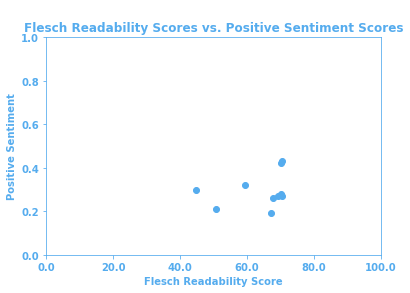

In [21]:
def make_scatter_plot_and_calculate_correlation_coefficient_for_flesch(x, y, plt_title, x_label, y_label, img_file_path):
    fig, ax = plt.subplots(edgecolor='#55acee', facecolor='white')
    ax.scatter(x, y, color='#55acee')

    ax.tick_params(axis='x', color='#55acee')
    ax.tick_params(axis='y', color='#55acee')
    ax.set_xlim([0, 100])
    ax.set_ylim([0, 1])

    ax.set_yticklabels(np.arange(0,1,.1),color='#55acee',  fontweight='bold')
    ax.set_xticklabels(np.arange(0,1,.1),color='#55acee',  fontweight='bold')

    ax.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%0.1f'))

    ax.spines['bottom'].set_color('#55acee')
    ax.spines['top'].set_color('#55acee') 
    ax.spines['right'].set_color('#55acee')
    ax.spines['left'].set_color('#55acee')
    
    print('Correlation coefficient for ' + x_label + ' and ' + y_label + ':')
    print(np.corrcoef(x, y))

    plt.title('\n' + plt_title, color='#55acee', fontweight='bold')
    plt.xlabel(x_label, fontweight='bold', color='#55acee')
    plt.ylabel(y_label, fontweight='bold', color='#55acee')

    plt.savefig(img_file_path)



make_scatter_plot_and_calculate_correlation_coefficient_for_flesch( flesch_list, positive_sentiment_float_list, 'Flesch Readability Scores vs. Positive Sentiment Scores', 'Flesch Readability Score', 'Positive Sentiment', 'PLOTS_AND_ASSOCIATED_ITEMS/PLOT_PICS/flesch_pos_scatter_plt.png')